**Импорт необходимых библиотек**

In [1]:
import numpy as np # импорт библиотеки numpy, которая помогает в работе с массивами и матрицами
import pandas as pd # импорт библиотеки pandas, которая является мощным инструментом для анализа и манипулирования данными
import seaborn as sns # импорт библиотеки seaborn, которая помогает с визуализацией данных в Python
import matplotlib.pyplot as plt # подмодуль библиотеки Matplotlib, который помогает в создании графиков и различных типов диаграмм

**Загрузка датасета в Google Colab**
1. 'from google.colab import files': импорт модуля 'files' из библиотеки 'google.colab', который предоставляет функции для работы с файлами в среде Google Colab;
2. 'uploaded = files.upload()': открытие диалогового окна, которое способствует загурзке файлов.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


**Чтение данных из файла и вывод первых 10 строк**

In [3]:
print('Первые 10 строк датасета:')
df = pd.read_csv("Groceries_dataset.csv") # использование библиотеки pandas для чтения данных из файла "Groceries_dataset.csv" и создания dataframe
df.head(10) #вывод первых 10 строк dataframe

Первые 10 строк датасета:


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


**Проверка на наличиче пустых строк**
1. 'df.isnull()': возврат dataframe того же размера, что и исходный df, но содержащий булевы значения True для ячеек, содержащих пропущенные значения (NaN), и False в противном случае;
2. 'df.isnull().any(axis=1)': создание Series, где для каждой строки в dataframe df есть True, если в этой строке хотя бы одна ячейка содержит пропущенное значение, и False в противном случае. axis=1 указывает, что операция проводится по строкам;
3. 'df[df.isnull().any(axis=1)]': выбор только тех строк из исходного dataframe df, где соответствующие значения в Series из пункта 2 равны True, то есть строки, в которых есть хотя бы одна ячейка с пропущенным значением.

In [4]:
print('Проверка на наличие пустых строк:')
empty_rows = df[df.isnull().any(axis=1)]
print("В файле нет пустых строк.") if empty_rows.empty else df.dropna()

Проверка на наличие пустых строк:
В файле нет пустых строк.


**Проверка на наличие дубликатов, а также функция, которая удаляет их при условии, что они есть**

In [5]:
def duplicate_detection(columns_to_check, total_duplicates, duplicate_rows):
  print("Обнаружены строки с точно такими же значениями в указанных столбцах:")
  for index, row in duplicate_rows.iterrows():
      print("Оригинальная строка:\n", row)
      duplicates = df[df[columns_to_check].eq(row[columns_to_check]).all(axis=1)]
      total_duplicates += duplicates.shape[0]
      print("Дубликат:\n", duplicates)
      print(f"Количество дубликатов: {duplicates.shape[0]} \n {'-' * 55}")
  print(f"Общее количество дубликатов в файле: {total_duplicates}")
  df.drop_duplicates(subset=['Member_number', 'Date', 'itemDescription'],inplace=True)
  print('Дубликаты удалены!')
columns_to_check = ['Member_number', 'Date', 'itemDescription']
total_duplicates = 0
# Проверка наличия дубликатов для конкретных столбцов
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]
print("В файле нет строк с точно такими же значениями в указанных столбцах.") if duplicate_rows.shape[0] == 0 else duplicate_detection(columns_to_check, total_duplicates, duplicate_rows)





Выходные данные были обрезаны до нескольких последних строк (5000).
Date                  12-11-2015
itemDescription    bottled water
Name: 24687, dtype: object
Дубликат:
        Member_number        Date itemDescription
24085           1170  12-11-2015   bottled water
24687           1170  12-11-2015   bottled water
Количество дубликатов: 2 
 -------------------------------------------------------
Оригинальная строка:
 Member_number                  2271
Date                     04-08-2015
itemDescription    other vegetables
Name: 24709, dtype: object
Дубликат:
        Member_number        Date   itemDescription
2227            2271  04-08-2015  other vegetables
8560            2271  04-08-2015  other vegetables
24709           2271  04-08-2015  other vegetables
Количество дубликатов: 3 
 -------------------------------------------------------
Оригинальная строка:
 Member_number             4468
Date                24-03-2015
itemDescription    canned beer
Name: 24717, dtype: object
Д

**Обзор основной информации о dataframe**

In [6]:
print('Обзор основной информации:')
df.info() # общее количество записей, индексы, столбцы, типы данных, использование памяти

Обзор основной информации:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


**Преобразование значений в столбце 'Date'**
1.   'df['Date']': обращение к столбцу 'Date';
2.   'pd.to_datetime(df['Date'])': преобразование значений в столбце 'Date' в формат времени и даты, используя функцию 'to_datetime' из библиотеки pandas;
3. 'df['Date'] = pd.to_datetime(df['Date'])': замена старых значений в столбце 'Date' новыми значениями;
4. 'df.info()': вывод обновленной информации о dataframe, включая типы данных каждого столбца.



In [7]:
print('Информация после преобразования в столбце "Date":')
df['Date'] = pd.to_datetime(df['Date']) # преобразование значений в столбце 'Date'
df.info() # вывод обновленной информации

Информация после преобразования в столбце "Date":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


<ipython-input-7-9200c1cac870>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date']) # преобразование значений в столбце 'Date'


**Подсчет пропущенных значений в каждом столбце dataset**

In [8]:
print("Количество пропущенных значений")
df.isnull().sum() #количество пропущенных значений в dataframe

Количество пропущенных значений


Member_number      0
Date               0
itemDescription    0
dtype: int64

**Анализ данных в столбце 'ItemDicription'**
1. 'df['itemDescription']': обращение к столбцу 'ItemDescription';
2. '.value_counts().head(10)': подсчет уникальных значений в столбце 'ItemDescription' и возвращает их частоту в порядке убывания;
3. '.head(10)': вывод первых 10 строк результата.



Графическое представление топ 10 столбца "ItemDicription"


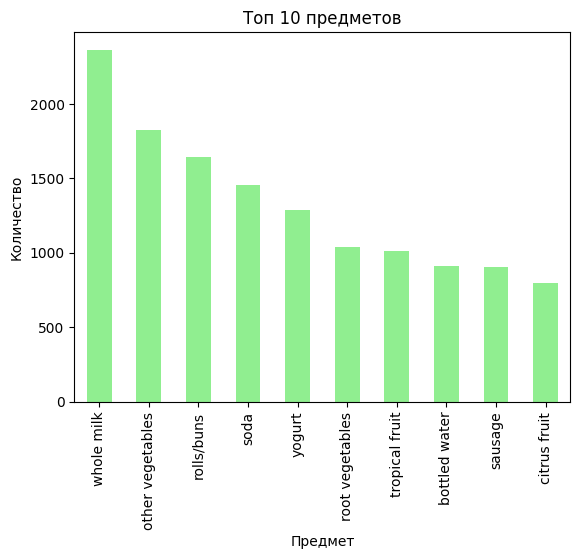

Табличное представление:


whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64

In [9]:
top_item = df['itemDescription'].value_counts().head(10) #сортировка в столбце "ItemDiscription"
plt.figure()
top_item.plot(kind='bar', color='lightgreen')
plt.title('Топ 10 предметов')
plt.xlabel('Предмет')
plt.ylabel('Количество')
print('Графическое представление топ 10 столбца "ItemDicription"')
plt.show()
print("Табличное представление:")
df['itemDescription'].value_counts().head(10)

**Анализ данных в столбцах "Member_number" и "Date"**
1. 'df.groupby('Member_number')['Date'].count(): группирует данные о dataframe по уникальным значениям в столбце 'Member_number' и для каждой группы подсчитывает количество записей в столбце 'Date';
2. '.sort_values(ascending=False)': сортирует результат в порядке убывания,чтобы получить покупателей с самым большим количеством покупок в начале;
3. 'member_shopping_frequency': присваивание результата данной переменной;
4. 'print(member_shopping_frequency)': вывод результата.



Графическое представление:


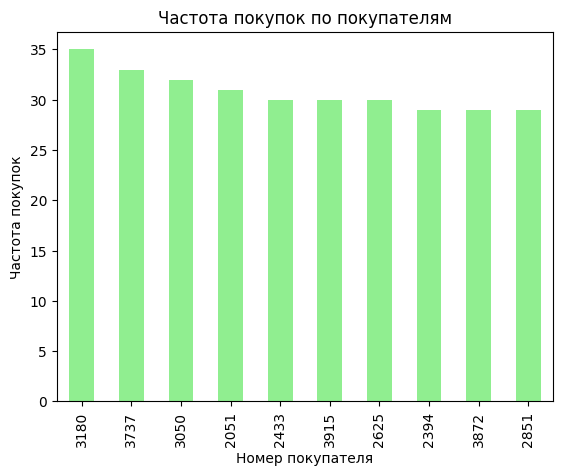

Табличное представление:


Member_number
3180    35
3737    33
3050    32
2051    31
2433    30
3915    30
2625    30
2394    29
3872    29
2851    29
Name: Date, dtype: int64

In [10]:
member_shopping_frequency = df.groupby('Member_number')['Date'].count().sort_values(ascending=False).head(10)
plt.figure()
member_shopping_frequency.plot(kind='bar', color='lightgreen')
plt.title('Частота покупок по покупателям')
plt.xlabel('Номер покупателя')
plt.ylabel('Частота покупок')
print("Графическое представление:")
plt.show()
print("Табличное представление:")
df.groupby('Member_number')['Date'].count().sort_values(ascending=False).head(10)

**Создание графика с использованием библиотеки "Seaborn"**

1. 'sns.distplot(member_shopping_frequency, bins=8, kde=False, color='green')': создание графика с использованием библиотеки seaborn:
  * 'member_shopping_frequency': данные, которые представляют собой количество покупок для каждого уникального покупателя (данные получены предыдущим кодом);
  * 'bins=8': количество интервалов в гистограмме;
  * 'kde=False': отключение наложения оценки плотности;
  * 'color='green': цвет гистограммы.
2. 'plt.xlabel('Количество покупок')': подпись для оси x (горизонтальная ось);
3. 'plt.ylabel('Количество покупателей')': подпись для оси y (вертикальная ось);
4. 'plt.title('Частота покупок')': заголовк графика;
5. 'plt.show()': отображение графика.

Графическое представление:


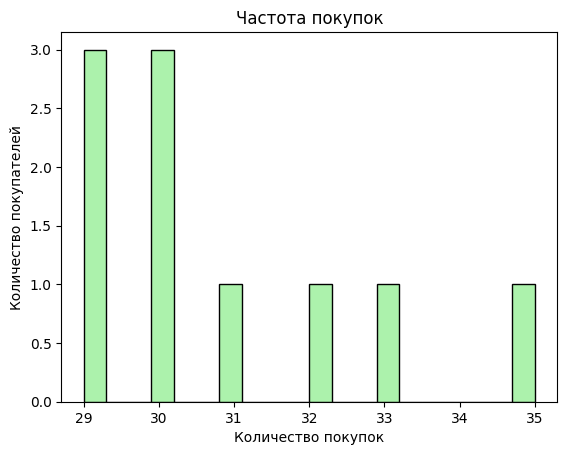

In [11]:
sns.histplot(member_shopping_frequency, bins=20, kde=False, color='lightgreen') # создание графика
plt.xlabel('Количество покупок') # ось x
plt.ylabel('Количество покупателей') # ось y
plt.title('Частота покупок') # заголовк
print("Графическое представление:")
plt.show() # вывод гистограммы

**Добавление нового столбца 'Month'**
1. 'df['Month'] = df['Date'].dt.month': создание нового столбца 'Month', который содержит месяц каждой даты из столбца 'Date';
2. 'monthly_purchase_counts = df['Month'].value_counts().sort_index()': посчет количества покупок для каждого месяца и сортировка результата в порядке возрастания;
3. 'plt.figure(figsize=(10, 6))': созданине графика с заданными размерами (ширина, высота);
4. 'sns.barplot(x=monthly_purchase_counts.index, y=monthly_purchase_counts.values, color='lightgreen')': создание столбчатой диаграммы при помощи библиотеки seaborn:
  * 'x=monthly_purchase_counts.index': значения по оси x (месяцы);
  * 'y=monthly_purchase_counts.values': значения по оси y (количество покупок);
  * 'color='lightgreen'': цвет столбцов.
5. 'plt.xlabel('Месяц')': подпись для оси x (горизонтальная ось);
6. 'plt.ylabel('Количество покупок')': подпись для оси y (вертикальная ось);
7. 'plt.title('Подсчитанное количество покупок')': заголовок графика;
8. 'plt.show()': отображение графика.








Графическое представление:


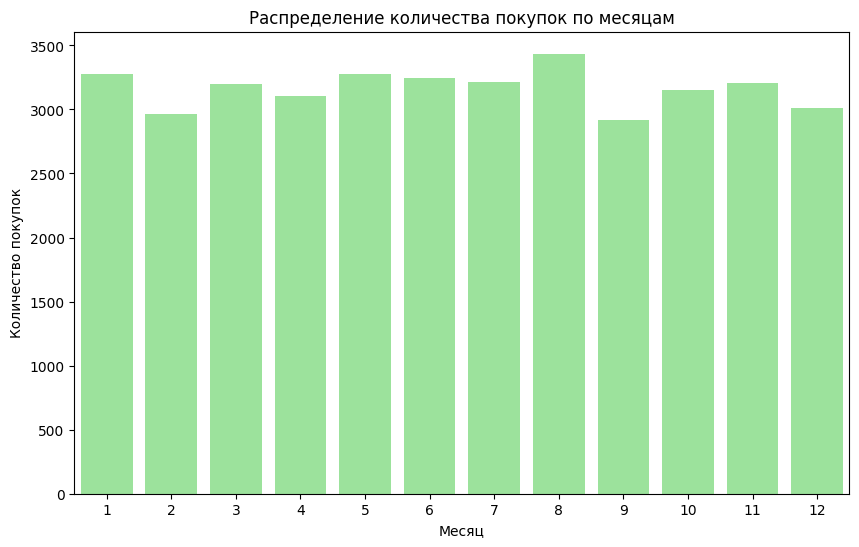

In [12]:
df['Month'] = df['Date'].dt.month # создание столбца
monthly_purchase_counts = df['Month'].value_counts().sort_index() # подсчет и сортировка
plt.figure(figsize=(10, 6)) # размеры графика
sns.barplot(x=monthly_purchase_counts.index, y=monthly_purchase_counts.values, color='lightgreen') # создание гистограммы
plt.xlabel('Месяц') # подпись оси х
plt.ylabel('Количество покупок') # подпись оси у
plt.title('Распределение количества покупок по месяцам') # название графика
print("Графическое представление:")
plt.show() # отображение графика

**Частота покупок 10 самых популярных товаров**


1. 'df.groupby('itemDescription').size()': сортировка по значениям в столбце 'ItemDescription' и подсчет количества покупок для каждого уникального элемента;
2. '.reset_index(name='frequancy_of_item')': сбрасывание индексов и добавление нового столбца 'frequency_of_item';
3. 'sort_values(by='frequancy_of_item',ascending=False)': сортировка результата в порядке убывания по столбцу 'frequency_of_item';
4. 'print(items)': вывод результата.



Графическое представление:


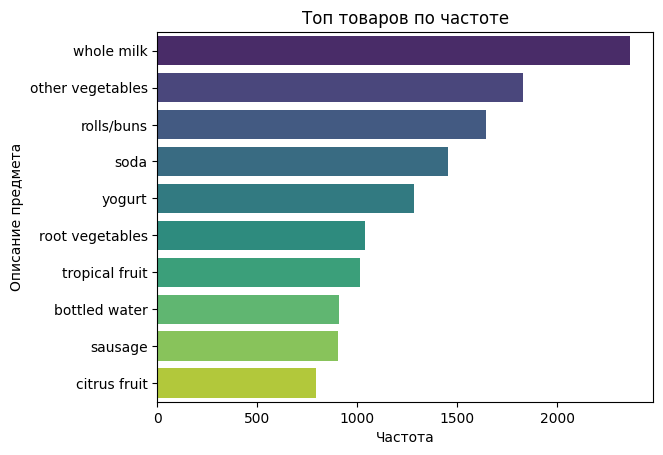


Табличное представление: 
            itemDescription  frequancy_of_item
164             whole milk               2363
102       other vegetables               1827
122             rolls/buns               1646
138                   soda               1453
165                 yogurt               1285
..                     ...                ...
124        rubbing alcohol                  5
5                     bags                  4
4           baby cosmetics                  3
79         kitchen utensil                  1
114  preservation products                  1

[167 rows x 2 columns]


In [13]:
items = df.groupby('itemDescription').size().reset_index(name='frequency_of_item').sort_values(by='frequency_of_item', ascending=False).head(10)
# Создайте график с использованием seaborn
plt.figure()
sns.barplot(x='frequency_of_item', y='itemDescription', data=items, palette='viridis')
plt.title('Топ товаров по частоте')
plt.xlabel('Частота')
plt.ylabel('Описание предмета')
print("Графическое представление:")
plt.show()
print()
items = df.groupby('itemDescription').size().reset_index(name='frequancy_of_item').sort_values(by='frequancy_of_item',ascending=False) # сортировка и подсчет
print("Табличное представление: \n", items) # вывод результата

**Удаление ранее созданного столбца 'Month'**
1. 'if 'Month' in df.columns': проверка, существует ли столбец 'Month';
2. 'df = df.drop(['Month'], axis=1)': если условие верное, то происходит удаление столбца 'Month';
3. 'print("Столбец 'Month' отсутствует")': если условие не верное, то выводится данное сообщение.

In [14]:
df = df.drop(['Month'], axis=1) if 'Month' in df.columns else print("Столбец 'Month' отсутствует") # удаление столбца 'month'

**Создание нового dataframe, который остортирован по возрастанию в столбце 'Member_number'**
1. 'group_same_customer = df.sort_values(by = 'Member_number',ascending = True)': создание нового dataframe, который является результатом сортировки исходного dataframe по столбцу 'Member_number' в порядке возрастания;
2. 'group_same_customer = df.sort_values(by = 'Member_number',ascending = True)': удаление пробелов в начале и конце каждой строки.

In [15]:
group_same_customer = df.sort_values(by = 'Member_number',ascending = True) # создание dataframe
group_same_customer['itemDescription'] = group_same_customer['itemDescription'].str.strip() # удаление пробелов
print(group_same_customer) # вывод результата

       Member_number       Date        itemDescription
17778           1000 2015-05-27     pickled vegetables
8395            1000 2015-03-15             whole milk
24544           1000 2015-03-15                 yogurt
13331           1000 2014-06-24             whole milk
18196           1000 2015-07-24        misc. beverages
...              ...        ...                    ...
11728           5000 2014-09-03  fruit/vegetable juice
19727           5000 2015-10-02        root vegetables
3578            5000 2015-10-02                   soda
34885           5000 2015-10-02    semi-finished bread
27877           5000 2014-09-03                 onions

[38006 rows x 3 columns]


**Создание нового списка, который хранит списки каждой отдельной группы**
1. 'transactions_list = []': инициализация списка, который будет содержать списки покупок для каждого клиента;
2. 'for _, group in group_same_customer.groupby('Member_number'):': цикл для итерации по группам, сгруппированным по столбцу 'Member_number';
3.  'customer_purchases = group['itemDescription'].tolist()': создание списка покупок для каждой группы;
4. 'transactions_list.append(customer_purchases)': добавление созданного списка покупок для текущего клиента в общий список покупок;

In [16]:
transactions_list = [] # инициализация списка
for _, group in group_same_customer.groupby('Member_number'): # цикл по группам
    customer_purchases = group['itemDescription'].tolist() # cоздание списка для каждой группы
    transactions_list.append(customer_purchases) # добавление в основной список

**Применение алгоритма "Априори" для поиска ассоциативных правил**
1. 'association_rules = apriori(transactions_list, min_support=0.001, min_confidence=0.05, min_lift=4, min_length=2,max_length = 2)
rules_list = list(association_rules)': применение алгоритма "Априори" к списку;
  * 'transactions_list': список транзакций;
  * ' min_support=0.001': минимальная поддержка;
  * 'min_confidence=0.05': минимальная уверенность;
  * ' min_lift=4': минимальное значение поднимающего коэффицента для извлечения правил;
  * 'min_length=2': минимальная длина ассоциативного правила;
  * 'max_length = 2': максимальная длина для ассоциативного правила.
2. 'rules_list = list(association_rules)': преобразование результатов в список;
3. 'print(rules_list)': вывод результатов;






In [17]:
!pip install apyori
from apyori import apriori
association_rules = apriori(transactions_list, min_support=0.001, min_confidence=0.05, min_lift=4, min_length=2,max_length = 2) # алгоритм "Априори"
rules_list = list(association_rules) # преобразование в список
rules_list # вывод результатов

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a6c25edc7a060c4a0de574ac0c52324f6d4175836c8c425eded6911457fefc16
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


[RelationRecord(items=frozenset({'Instant food products', 'soups'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'soups'}), confidence=0.06666666666666667, lift=5.413888888888889), OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'Instant food products'}), confidence=0.08333333333333333, lift=5.413888888888889)]),
 RelationRecord(items=frozenset({'canned fruit', 'soft cheese'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'soft cheese'}), confidence=0.19047619047619047, lift=5.050858438613541)]),
 RelationRecord(items=frozenset({'canned vegetables', 'rum'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rum'}), items_add=frozenset({'canned vegetables'}), confidence=0.125, lift=6.090625)]),
 RelationRecord(items=frozenset({'tea', 'cat food'}), supp

**Откорректированный вывод данных**

In [18]:
def apriori_df(results):
    extracted_data = []
    for result in results:
        items_base = tuple(result.ordered_statistics[0].items_base)[0]
        items_add = tuple(result.ordered_statistics[0].items_add)[0]
        support = result.support
        confidence = result.ordered_statistics[0].confidence
        lift = result.ordered_statistics[0].lift
        extracted_data.append((items_base, items_add, support, confidence, lift))
    return extracted_data
resultsinDataFrame = pd.DataFrame(apriori_df(rules_list), columns = ['antecedent', 'consequent', 'Support', 'Confidence', 'Lift'])
print("Табличное представление:")
resultsinDataFrame

Табличное представление:


,antecedent,consequent,Support,Confidence,Lift
0,Instant food products,soups,0.001026,0.066667,5.413889
1,canned fruit,soft cheese,0.001026,0.190476,5.050858
2,rum,canned vegetables,0.001026,0.125000,6.090625
3,tea,cat food,0.001796,0.259259,5.909898
4,ready soups,chewing gum,0.001026,0.266667,5.973946
5,cookware,ice cream,0.001026,0.235294,4.168984
6,curd cheese,mustard,0.001283,0.108696,4.655996
7,decalcifier,dessert,0.001026,0.444444,5.140785
8,dental care,seasonal products,0.001026,0.121212,4.678068
9,dog food,frozen potato products,0.001283,0.074627,4.040216


**Графическое представление "Лифта"**

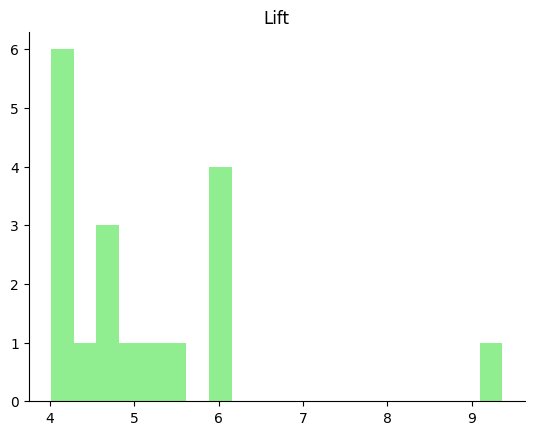

In [19]:
from matplotlib import pyplot as plt
resultsinDataFrame['Lift'].plot(kind='hist', bins=20, title='Lift', color='lightgreen')
plt.ylabel('')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Графическое представление "Поддержки"**

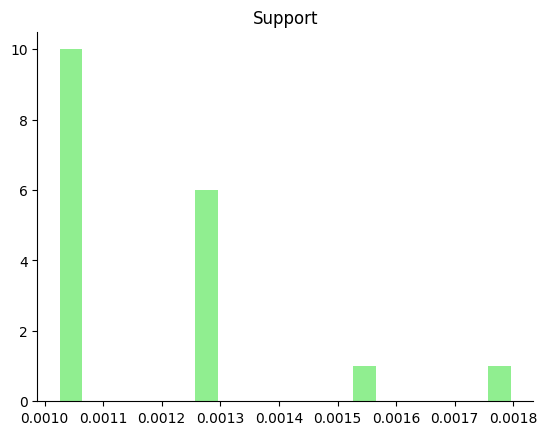

In [20]:
resultsinDataFrame['Support'].plot(kind='hist', bins=20, title='Support', color='lightgreen')
plt.ylabel('')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Графическое представление "Уверенности"**

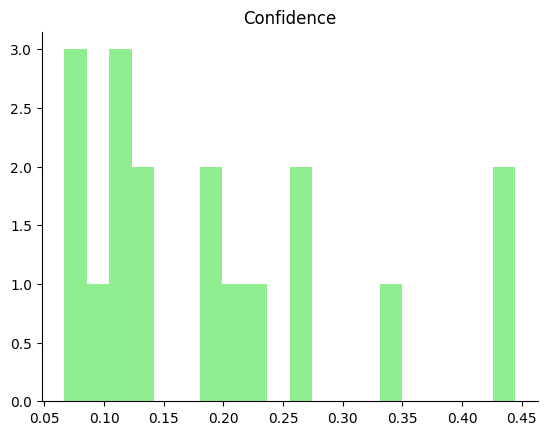

In [21]:
resultsinDataFrame['Confidence'].plot(kind='hist', bins=20, title='Confidence', color='lightgreen')
plt.ylabel('')
plt.gca().spines[['top', 'right',]].set_visible(False)